In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])

In [3]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
mapping = {0:'setosa', 1:'versicolor', 2:'virginica'}
y['species'] = y['species'].map(mapping)

In [7]:
y = pd.get_dummies(y)

In [8]:
y

,species_setosa,species_versicolor,species_virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
input_dim = X_train.shape[1]
hidden_dim = 4  
output_dim = y_train.shape[1]

In [11]:
v = np.random.normal(0, 1, (input_dim, hidden_dim)) 
w = np.random.normal(0, 1, (hidden_dim, output_dim))

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [13]:
def forward_pass(x, v, w):
    z_in = np.dot(x, v)
    z = sigmoid(z_in)
    y_in = np.dot(z, w)
    y_hat = sigmoid(y_in)
    
    return y_hat, z


In [14]:
def backward_pass(c, x, z, v, w, y, y_hat):
    dy = c * (y_hat - y) * y_hat * (1 - y_hat) 
    dw = np.dot(z.T, dy)  
    dz = np.dot(dy, w.T) * z * (1 - z)  
    dv = np.dot(x.T, dz) 
    
    w = w - c * dw  
    v = v - c * dv
    
    return w, v

In [15]:
def train(x, v, w, y):
    c = 0.1
    epochs = 250
    errors = []
    weight_norms_v = []
    weight_norms_w = []
    
    for i in range(epochs):
        y_hat, z = forward_pass(x, v, w)
        error = np.mean(np.square(y - y_hat))
        errors.append(error)
        
        weight_norms_v.append(np.linalg.norm(v))
        weight_norms_w.append(np.linalg.norm(w))
        
        w, v = backward_pass(c, x, z, v, w, y, y_hat)
        
    return errors, weight_norms_v, weight_norms_w, w, v


In [16]:
errors, weight_norms_v, weight_norms_w, final_w, final_v = train(X_train, v, w, y_train)

In [17]:
print(f"Final Weights: {final_w}, {final_v}")

Final Weights: [[ 1.10242654  0.44340285 -0.79989213]
 [ 0.85614792 -0.83712204 -0.14242874]
 [-1.86839417 -0.11305059  0.63620881]
 [ 0.31827559  0.29408731 -1.22439689]], [[-0.32475254  1.92539876  0.97660658  0.19037107]
 [-1.25417549  1.14692414  1.72073118  2.02929409]
 [-1.33755999 -0.92650557 -0.95034083  0.99538229]
 [-1.17418718  0.01630805  0.93006974  0.55244342]]


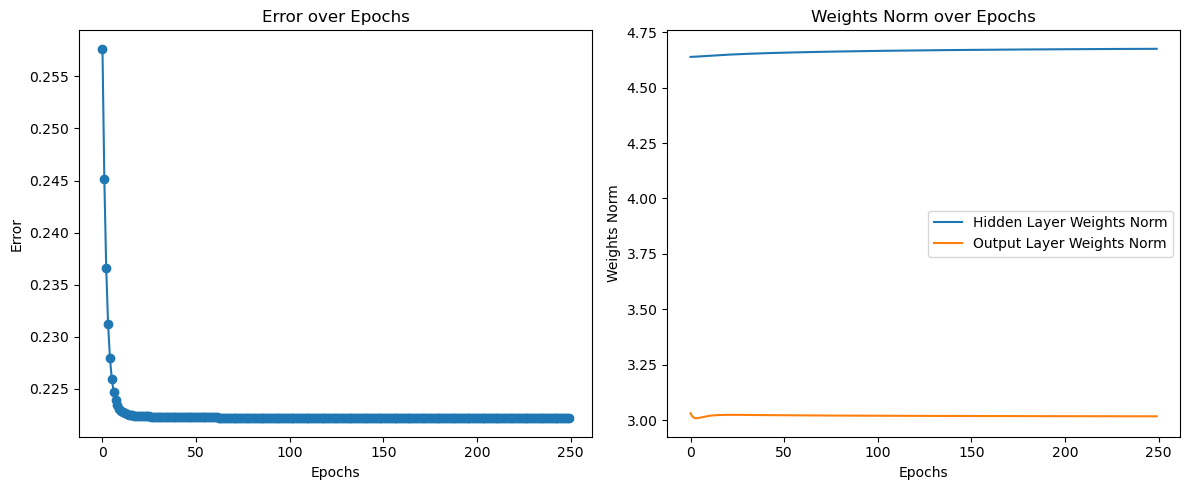

In [18]:
# Plotting the errors and weight norms
plt.figure(figsize=(12, 5))

# Plot error over epochs
plt.subplot(1, 2, 1)
plt.plot(errors, marker='o')
plt.title('Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')

# Plot weight norms over epochs
plt.subplot(1, 2, 2)
plt.plot(weight_norms_v, label='Hidden Layer Weights Norm')
plt.plot(weight_norms_w, label='Output Layer Weights Norm')
plt.title('Weights Norm over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Weights Norm')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
def test(x, v, w, y):
    y_hat, _ = forward_pass(x, v, w)
    predictions = np.argmax(y_hat, axis=1)
    true_labels = np.argmax(y.values, axis=1)
    accuracy = np.mean(predictions == true_labels)
    return accuracy

In [20]:
accuracy = test(X_test, final_v, final_w, y_test)

In [21]:
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 30.00%
